In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Creating a data wrangle function.
def wrangle(filepath):
    # importing the dataset.
    df = pd.read_csv(filepath)
    
    #Can see all the columns with this code.
    #pd.pandas.set_option('display.max_rows', None)
    
    # Below code gives percentage of null in every column
    null_percentage = df.isnull().sum()/df.shape[0]*100
    # Below code gives list of columns having more than 60% null
    col_to_drop = null_percentage[null_percentage>60].keys()
    df.drop(col_to_drop, axis=1,inplace=True)
    
    #Removing all the columns which are less than three.
    df.drop(columns=["Street"],inplace = True)
    #Removing columns with high cardinality.
    df.drop(columns=["Neighborhood","Exterior2nd","Utilities","CentralAir"],inplace=True)
    print(col_to_drop)
    return df


In [ ]:
df = wrangle("/content/test.csv")

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [ ]:
df.select_dtypes("object").nunique()

MSZoning          5
LotShape          4
LandContour       4
LotConfig         5
LandSlope         3
Condition1        9
Condition2        5
BldgType          5
HouseStyle        7
RoofStyle         6
RoofMatl          4
Exterior1st      13
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           4
HeatingQC         5
Electrical        4
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        4
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [ ]:
na=df.isna().sum().sort_values(ascending=False)
na

FireplaceQu      730
LotFrontage      227
GarageQual        78
GarageCond        78
GarageFinish      78
                ... 
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
SaleCondition      0
Length: 71, dtype: int64

In [ ]:
df = df.replace(' ', np.nan)

In [ ]:
cat=df.select_dtypes("object")
[df[x].replace(np.nan, 'NA', inplace=True) for x in cat.columns]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
num_data=df.select_dtypes("int64")
[df[col].replace(np.nan,'0.0', inplace=True) for col in num_data]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
df["GarageYrBlt"].replace(np.nan,'0.0', inplace=True)
df["MasVnrArea"].replace(np.nan,'None', inplace=True)

In [ ]:
df.to_csv("PremierProject_Actuals.csv")

Import Cleaned file

In [ ]:
df=pd.read_csv("PremierProject.csv")

Check unique values in ordinal features and convert them into numerical values

In [ ]:
df['FireplaceQu'].unique()

array(['NA', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
for col in ['KitchenQual','FireplaceQu','GarageQual', 'GarageCond','BsmtQual','BsmtCond',
               'HeatingQC','ExterQual','ExterCond',]:
    df[col] = df[col].replace({'Ex':5,'Gd':4,'TA': 3,'Fa': 2,'Po': 1,'NA':0}).fillna(0)

Convert float into int columns

In [ ]:
df["ExterCond"]=df["ExterCond"].astype(int)

Check correlation 


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


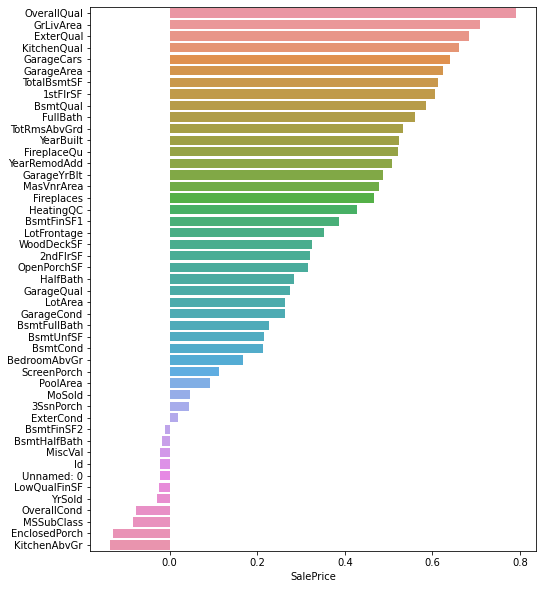

In [ ]:
corr=df.corr()
corr=corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

In [ ]:
df["MiscVal"].unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500])

Drop columns with unwanted correlation

In [ ]:
df=df.drop(["Id","Unnamed: 0"],axis=1)

Create Baseline model 

In [ ]:
X=df.drop(["SalePrice"],axis=1)
Y=df["SalePrice"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


In [ ]:
y_mean = y_train.mean()
y_mean

181438.53424657535

In [ ]:
y_pred_baseline = [y_mean] * len(y_train)

Select features for xgboost and calculate the baseline mae

In [ ]:
X1=df.select_dtypes("int64").drop(["SalePrice","Id"],axis=1)
Y1=df["SalePrice"]



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,Y1,test_size=0.3,random_state=1)

In [ ]:
from sklearn.metrics import mean_absolute_error
baseline_mae = mean_absolute_error(y_train,y_pred_baseline)
print("Mean apt price:", round(y_mean,2))
print("Baseline MAE:", round(baseline_mae,2))

Mean apt price: 181438.53
Baseline MAE: 56108.37


In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 4000, learning_rate = 0.005, max_depth = 5, colsample_bytree = 0.3, gamma = 0)

model.fit(X_train, y_train)

y_pred_xgb=model.predict(X_test)

[11:21:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


mae and rmse for xgboost is well below baseline

In [ ]:
mae_xgb=mean_absolute_error(y_test,y_pred_xgb)
mae_xgb

15556.89887450057

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
rmse

23647.402986560424

Fit and residuals are reasonable for xgb:

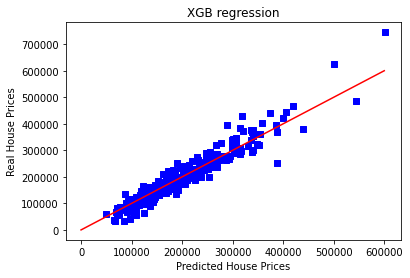

In [ ]:
plt.scatter(y_pred_xgb, y_test, c = "blue", marker = "s", label = "Training House Prices")
plt.title("XGB regression")
plt.xlabel("Predicted House Prices")
plt.ylabel("Real House Prices")
plt.plot([0, 600000], [0, 600000], c = "red")
plt.show()

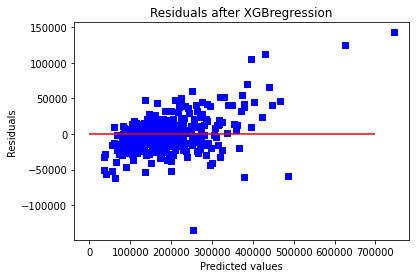

In [ ]:
plt.scatter(y_test, y_test - y_pred_xgb, c = "blue", marker = "s", label = "Training data")
plt.title("Residuals after XGBregression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 0, xmax = 700000, color = "red")
plt.show()

Feature weights assigned by the model:

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


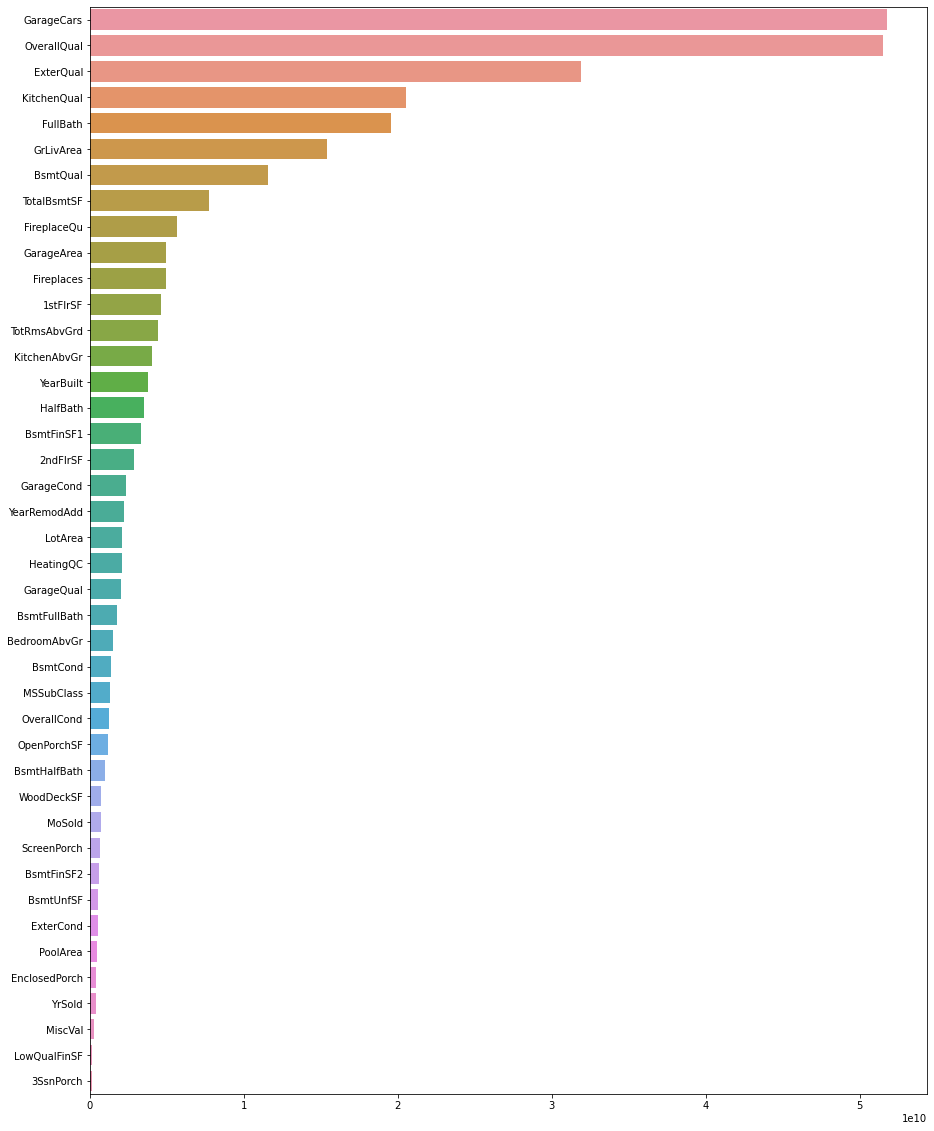

In [ ]:
hashmap=model.get_booster().get_score(importance_type='gain')
sorted_hm=sorted(hashmap.items(),key=lambda x:x[1],reverse =True)
plt.figure(figsize=(15,20))
x=[e[0]for e in sorted_hm]
y=[e[1]for e in sorted_hm]
sns.barplot(y,x)

In [ ]:
x=list(X1.columns)
x

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
test=pd.DataFrame({e:0 for e in x},index=range(len(x)))
predicted_new=model.predict(test)

In [ ]:
predicted_new

array([31722.756, 31722.756, 31722.756, 31722.756, 31722.756, 31722.756,
       31722.756, 31722.756, 31722.756, 31722.756, 31722.756, 31722.756,
       31722.756, 31722.756, 31722.756, 31722.756, 31722.756, 31722.756,
       31722.756, 31722.756, 31722.756, 31722.756, 31722.756, 31722.756,
       31722.756, 31722.756, 31722.756, 31722.756, 31722.756, 31722.756,
       31722.756, 31722.756, 31722.756, 31722.756, 31722.756, 31722.756,
       31722.756, 31722.756, 31722.756, 31722.756, 31722.756, 31722.756],
      dtype=float32)

In [ ]:
X1.iloc[0]

MSSubClass         60
LotArea          8450
OverallQual         7
OverallCond         5
YearBuilt        2003
YearRemodAdd     2003
ExterQual           4
ExterCond           3
BsmtQual            4
BsmtCond            3
BsmtFinSF1        706
BsmtFinSF2          0
BsmtUnfSF         150
TotalBsmtSF       856
HeatingQC           5
1stFlrSF          856
2ndFlrSF          854
LowQualFinSF        0
GrLivArea        1710
BsmtFullBath        1
BsmtHalfBath        0
FullBath            2
HalfBath            1
BedroomAbvGr        3
KitchenAbvGr        1
KitchenQual         4
TotRmsAbvGrd        8
Fireplaces          0
FireplaceQu         0
GarageCars          2
GarageArea        548
GarageQual          3
GarageCond          3
WoodDeckSF          0
OpenPorchSF        61
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              2
YrSold           2008
Name: 0, dtype: int64

Lasso Regression gives a reasonable result:

In [ ]:
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha = 0.001, random_state=1)



In [ ]:
model_lasso.fit(X_train,y_train)
y_pred_lasso=model_lasso.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.478e+10, tolerance: 6.080e+08
  model = cd_fast.enet_coordinate_descent(


In [ ]:
mae_lasso=mean_absolute_error(y_test,y_pred_lasso)
mae_lasso

21087.319540552497

In [ ]:
rmse_l = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_l

33955.49056677872

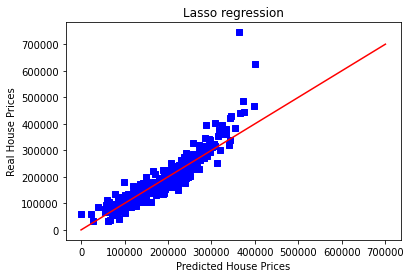

In [ ]:
plt.scatter(y_pred_lasso, y_test, c = "blue", marker = "s", label = "Training House Prices")
plt.title("Lasso regression")
plt.xlabel("Predicted House Prices")
plt.ylabel("Real House Prices")
plt.plot([0, 700000], [0, 700000], c = "red")
plt.show()

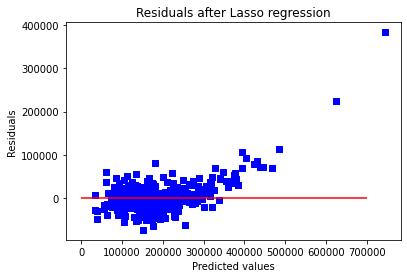

In [ ]:
plt.scatter(y_test, y_test - y_pred_lasso, c = "blue", marker = "s", label = "Training data")
plt.title("Residuals after Lasso regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y = 0, xmin = 0, xmax = 700000, color = "red")
plt.show()